In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

def plot_scenario_data(df, name):
    df.columns = ['Unnamed: 0', 'Heuristic Stress', 'Predictability-Control Stress', 'Value Stress', 'Control Stress', 'Predictability stress', 'state_name','end_state']
    df = df.drop(labels=["Unnamed: 0", "end_state"], axis=1) # 'Heuristic_Stress's

    #yerr=df.std()
    #print(df)
    #print(yerr)

    df_means = df.groupby("state_name").mean() #.aggregate(['mean', 'std'])
    df_var = df.groupby("state_name").var()

    #print(df_means)
    #df = df[df.state_name != "preflight"]
    try:
        df_means = df_means.drop(["landed", "crashed"]) #"crashed" is not removed for now use it as "max stress"
    except KeyError as ke:
        print("no crashed or landed data to drop in plot_scenario_data")
    try:
        df_means = df_means.drop(["preflight"])
    except KeyError as ke2:
        print("No preflight data in df in plot_scenario_data")
        
    fig = plt.figure(figsize=(18,9))
    ax = df_means.plot(kind = "bar", figsize=(14,6), title=name, yerr=2*df_var, align='center')
    ax.set(xlabel="Flight state", ylabel="Estimated stress level")
    ax.set_ylim(0, 1)
    #ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
    ax.grid(visible=True, axis='y', linestyle='-.')

    plt.show()
    return df



In [2]:
df_scen1 = pd.read_csv("./data/stress_data_scenario_one__.csv") #simple
df_scen2 = pd.read_csv("./data/stress_data_scenario_two__.csv") #wind
df_scen3 = pd.read_csv("./data/stress_data_scenario_three__.csv") #fuel
df_scen4 = pd.read_csv("./data/stress_data_scenario_four__.csv") #extreme

In [3]:

def compute_ci(df):
    df.columns = ['Unnamed: 0', 'Heuristic Stress', 'Predictability-Control Stress', 'Value Stress', 'Control Stress', 'Predictability stress', 'state_name','end_state']
    df = df.drop(labels=["Unnamed: 0", "end_state"], axis=1) # 'Heuristic_Stress's

    condition_names = ['Heuristic Stress', 'Predictability-Control Stress', 'Value Stress', 'Control Stress', 'Predictability stress']

    for condition in condition_names:
        print("-------")
        col_stats = df[[condition, "state_name"]].groupby("state_name").agg(['mean', 'count', 'std'])
        #print(col_stats)

        try:
            stats = col_stats.drop(["preflight", "landed", "crashed"]) #"crashed" is not removed for now use it as "max stress"
        except KeyError:
            stats = col_stats.drop(["preflight"]) 

        #print(stats)

        ci95_hi = []
        ci95_lo = []

        for i in stats.index:
            #print(i)
            m, c, s = stats.loc[i]
            ci95_hi.append(m + 1.96*s/math.sqrt(c))
            ci95_lo.append(m - 1.96*s/math.sqrt(c))

        stats['ci95_hi'] = ci95_hi
        stats['ci95_lo'] = ci95_lo
        print(stats)


compute_ci(df_scen1)


No preflight state present in the data to drop!
No preflight state present in the data to drop!
No preflight state present in the data to drop!
No preflight state present in the data to drop!
No preflight state present in the data to drop!


No preflight data in df in plot_scenario_data


<Figure size 1296x648 with 0 Axes>

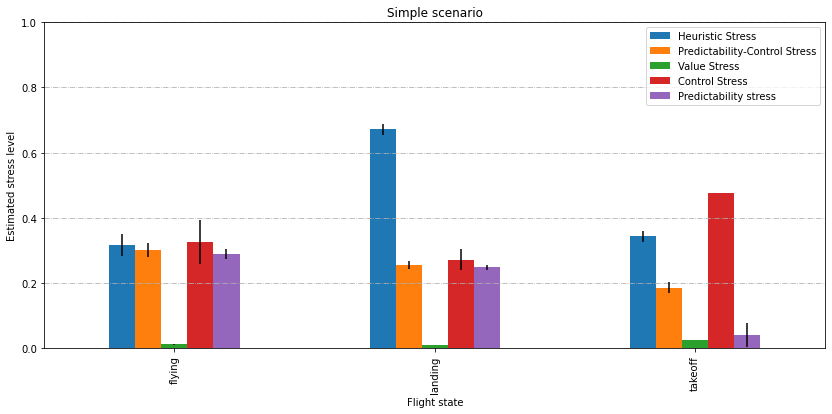

In [4]:
df = plot_scenario_data(df_scen1, name="Simple scenario")
#df2 = plot_scenario_data(df_scen1_b)
print(df)

In [ ]:
#df = plot_scenario_data(df_scen1_b, name="Simple scenario, test with updated data for blue")
#print(df)
# -> no difference

In [ ]:
df = plot_scenario_data(df_scen2, name="Wind scenario")
print(df)

In [ ]:
df = plot_scenario_data(df_scen3, name="Fuel scenario")
print(df)

In [ ]:
df = plot_scenario_data(df_scen4, name="Extreme scenario")
print(df)

In [ ]:
# Extra tool needed to do the box plots
def plot_scenario_data_box(df, name):
    df.columns = ['Unnamed: 0', 'Heuristic Stress', 'Predictability-Control Stress', 'Value Stress', 'Control Stress', 'Predictability stress', 'state_name','end_state']
    df = df.drop(labels=["Unnamed: 0", "end_state"], axis=1) # 'Heuristic_Stress's

    labels = ['Heuristic Stress', 'Predictability-Control Stress', 'Value Stress', 'Control Stress', 'Predictability stress']
    df = df.groupby("state_name").mean()
  
    #df = df[df.state_name != "preflight"]
    try:
        df = df.drop(["landed", "crashed"]) #"crashed" is not removed for now use it as "max stress"
    except KeyError as ke:
        print("No landed or crashed state to drop in box")
    
    try:
        df = df.drop(["preflight"])
    except KeyError as ke2:
        print("No preflight state present in the data to drop in box")
    
    fig = plt.figure(figsize=(18,9))
    #ax = df.plot(figsize=(14,6), title=name)
    ax = plt.gca()
    bplot1 = ax.boxplot(df,
                        #notch=True,  # notch shape
                        vert=True,  # vertical box alignment
                        patch_artist=True,  # fill with color)
                        labels=labels
    )
    
    colors = ['pink', 'lightblue', 'lightgreen', 'blue', 'red']

    zipped = zip(bplot1['boxes'], colors)
    for patch, color in zipped:
        patch.set_facecolor(color)

    ax.set(xlabel="Flight state", ylabel="Estimated stress level")
    ax.set_ylim(0, 1)
    #ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
    ax.grid(visible=True, axis='y', linestyle='-.')

    plt.show()
    return df